# Regularization in Machine Learning

Please, make a copy of this colaboratory in order to be able to make changes **(File -> Save a copy in Drive)**.

In [ ]:
import pandas as pd
import numpy as np

import os

import warnings
warnings.filterwarnings('ignore') #does not really work anyway :)

# Cannot live without plotnine :)
!pip install -q plotnine
from plotnine import *

# Regularisation 

## Simple linear regression vs ridge regression and lasso regression. 

Toy 2D example returns to help us with regularisation

In [ ]:
# Note that distance and fare_amount were substituted with `x` and `y` for simplification
example_data = pd.DataFrame({'x':[1,2,3,4,5], 'y':[2,4,5,4,5]})
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


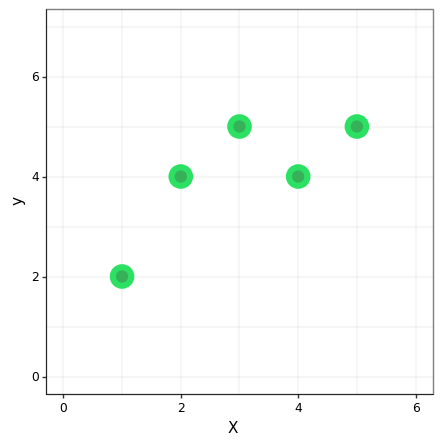

<ggplot: (8747320573909)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black'))
)
fig

Going back to the roots :)

 <center><font size = 4> 
$w_1 = \dfrac{\sum(x-\overline{x})(y-\overline{y})}{\sum(x-\overline{x})^2}$
<center><font size = 4> 
$ $
<center><font size = 4> 
$w_0 = \overline{y} - w_1\cdot\overline{x}$ 
  

Let's train (again) a linear regression model

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(example_data[['x']], example_data[['y']])

LinearRegression()

In [ ]:
print(lr.coef_[0,0])
print(lr.intercept_)

0.6
[2.2]


Let's visualise this regression line:

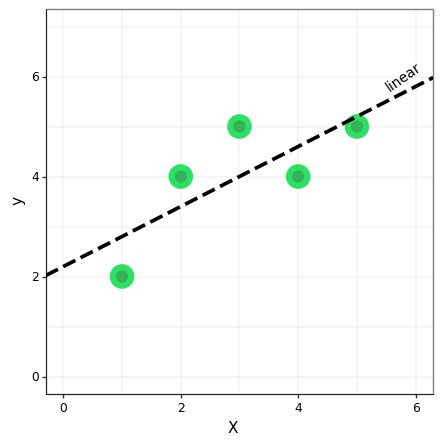

<ggplot: (8747320491229)>

In [ ]:
fig = (fig + geom_abline(intercept = lr.intercept_, slope = lr.coef_[0,0], color="black", linetype="dashed", size=1.5)+
       annotate("text", label = "linear", x = 5.8, y = 6, size = 10, colour = "black", angle = 35)
       )
fig

In [ ]:
from sklearn.linear_model import Lasso, Ridge

In [ ]:
# Initialising all three regression models
lr = LinearRegression()

lambda_ = 1
##### YOUR CODE STARTS #####
# Ridge regression
lr_ridge = Ridge(lambda_) # L2 regularisation + Linear Regression

# Lasso 
lr_lasso = Lasso(lambda_) # L1 regularisation + Linear Regression
##### YOUR CODE ENDS ##### 

In [ ]:
#fit linear regression
lr.fit(example_data[['x']], example_data[['y']])

##### YOUR CODE STARTS #####
#fit Ridge and Lasso regressions
lr_ridge.fit(example_data[['x']], example_data[['y']])
lr_lasso.fit(example_data[['x']], example_data[['y']])
##### YOUR CODE ENDS ##### 

Lasso(alpha=1)

Let's print our weights and intercepts for each model:

In [ ]:
print(f'Sklearn Linear regression w1 is {lr.coef_} and intercept is {lr.intercept_}')
print(f'Sklearn Ridge regression w1 is {lr_ridge.coef_} and intercept is {lr_ridge.intercept_}')
print(f'Sklearn Lasso regression w1 is {lr_lasso.coef_} and intercept is {lr_lasso.intercept_}')

Sklearn Linear regression w1 is [[0.6]] and intercept is [2.2]
Sklearn Ridge regression w1 is [[0.54545455]] and intercept is [2.36363636]
Sklearn Lasso regression w1 is [0.1] and intercept is [3.7]


Now we can add **Ridge** and **LASSO** regression to our figure. No need to add a baseline linear regression, as we have already done it. First let's add Ridge regression line in red.

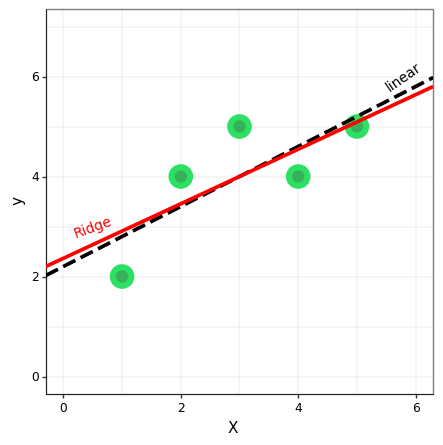

<ggplot: (8747320594845)>

In [ ]:
fig = (
    fig + geom_abline(intercept = lr_ridge.intercept_, slope = lr_ridge.coef_[0], color="red", linetype="solid", size=1.5)+
    # each line like this adds a label into a specific position with a specific colour
    annotate("text", label = "Ridge", x = 0.5, y = 3, size = 10, colour = "red", angle = 20) 
)
fig

Now Lasso in blue:

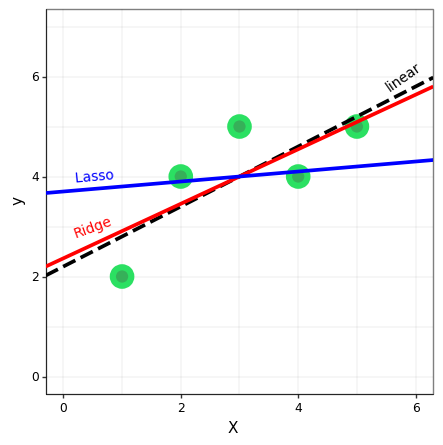

<ggplot: (8747317112337)>

In [ ]:
fig = (
    fig + geom_abline(intercept = lr_lasso.intercept_, slope = lr_lasso.coef_[0], color="blue", linetype="solid", size=1.5)+
    annotate("text", label = " Lasso", x = 0.5, y = 4, size = 10, colour = "blue", angle = 5)
    
    )
fig

This was way too easy. Let's add more features to our toy example by producing multiple polynomials form the original `x` feature.

In [ ]:
example_data

,x,y
0,1,2
1,2,4
2,3,5
3,4,4
4,5,5


In [ ]:
example_data['x^2'] = example_data.x**2
example_data['x^3'] = example_data.x**3
example_data['x^4'] = example_data.x**4

In [ ]:
example_data

,x,y,x^2,x^3,x^4
0,1,2,1,1,1
1,2,4,4,8,16
2,3,5,9,27,81
3,4,4,16,64,256
4,5,5,25,125,625


In [ ]:
lr = LinearRegression()

# Regularization strength
lambda_ = 1

# Ridge regression (L2)
lr_ridge = Ridge(lambda_)

# Lasso regression (L1)
lr_lasso = Lasso(lambda_)

Here we should use new features to fit all three models:

In [ ]:
lr.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_lasso.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

Lasso(alpha=1)

Printing out resulting coefficients, what can you notice?

In [ ]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression, forces coefficients to be small: [{lr_ridge.coef_}, {round(lr_ridge.intercept_[0], 8)}]')
print(f'Lasso regression, acts as a feature selection: [{lr_lasso.coef_}, {round(lr_lasso.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression, forces coefficients to be small: [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Lasso regression, acts as a feature selection: [[ 0.          0.          0.05608653 -0.00829621], 3.1005046]


To visualise the resulting trends we need a synthetic data for visualisation:

In [ ]:
visualisation_data = pd.DataFrame({'x': np.linspace(start=0, stop=6, num=61),
                          'x^2': np.linspace(start=0, stop=6, num=61)**2,
                          'x^3': np.linspace(start=0, stop=6, num=61)**3,
                          'x^4': np.linspace(start=0, stop=6, num=61)**4})

visualisation_data.head()

,x,x^2,x^3,x^4
0,0.0,0.00,0.000,0.0000
1,0.1,0.01,0.001,0.0001
2,0.2,0.04,0.008,0.0016
3,0.3,0.09,0.027,0.0081
4,0.4,0.16,0.064,0.0256


Use function `predict` to produce additional columns for each type of model

In [ ]:
##### YOUR CODE STARTS #####
visualisation_data['lr_y'] = lr.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_y'] = lr_ridge.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_lasso_y'] = lr_lasso.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
##### YOUR CODE ENDS ##### 
visualisation_data

,x,x^2,x^3,x^4,lr_y,lr_ridge_y,lr_lass_y,lr_lasso_y
0,0.0,0.00,0.000,0.0000,5.000000,1.720502,3.100505,3.100505
1,0.1,0.01,0.001,0.0001,4.200688,1.765307,3.100560,3.100560
2,0.2,0.04,0.008,0.0016,3.544000,1.821272,3.100940,3.100940
3,0.3,0.09,0.027,0.0081,3.017188,1.887222,3.101952,3.101952
4,0.4,0.16,0.064,0.0256,2.608000,1.962028,3.103882,3.103882
...,...,...,...,...,...,...,...,...
56,5.6,31.36,175.616,983.4496,10.096000,5.139591,4.791290,4.791290
57,5.7,32.49,185.193,1055.6001,11.508688,5.229498,4.729854,4.729854
58,5.8,33.64,195.112,1131.6496,13.120000,5.333070,4.655254,4.655254
59,5.9,34.81,205.379,1211.7361,14.945188,5.451616,4.566680,4.566680


We can now visualise these trends, each line in its own colour (red - Ridge, blue - LASSO, black - simple linear regression).

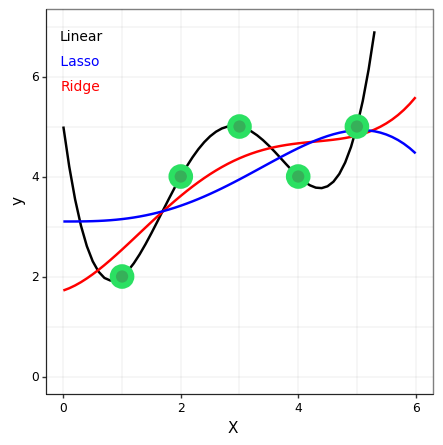

<ggplot: (8747316741201)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_y'), size = 1, colour = 'black') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_y'), size = 1, colour = 'red') +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_lasso_y'), size = 1, colour = 'blue') +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False) + 
    annotate("text", label = "Linear", x = 0.3, y = 6.8, size = 10, colour = "black", angle = 0) +
     annotate("text", label = " Lasso", x = 0.25, y = 6.3, size = 10, colour = "blue", angle = 0)+
    annotate("text", label = "Ridge", x = 0.3, y = 5.8, size = 10, colour = "red", angle = 0)  
)
fig

Here, we are playing around with `lambda_` coefficients for Ridge regression. Let's see where this leads us:

In [ ]:
# Ridge regression (L2)
lr_ridge_01 = Ridge(0.1)
lr_ridge_05 = Ridge(0.5)
lr_ridge_08 = Ridge(0.8)
lr_ridge_1 = Ridge(1)
lr_ridge_1000 = Ridge(1000)

# Train each one of these models on example_data
lr_ridge_1000.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_01.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_05.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_08.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])
lr_ridge_1.fit(example_data[['x', 'x^2', 'x^3', 'x^4']], example_data[['y']])

# Predict each one of these models on visualisation_data to visualise them
visualisation_data['lr_ridge_01_y'] = lr_ridge_01.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_05_y'] = lr_ridge_05.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_08_y'] = lr_ridge_08.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_1_y'] = lr_ridge_1.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])
visualisation_data['lr_ridge_1000_y'] = lr_ridge_1000.predict(visualisation_data[['x', 'x^2', 'x^3', 'x^4']])

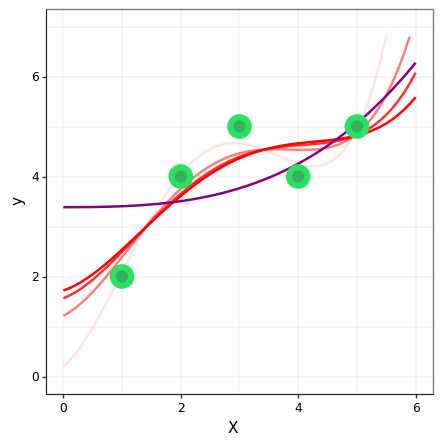

<ggplot: (8747316724013)>

In [ ]:
fig = (
    ggplot(data = example_data,
          mapping = aes(x = 'x', y = 'y')) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_01_y'), size = 1, colour = 'red', alpha = 0.1) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_05_y'), size = 1, colour = 'red', alpha = 0.5) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_08_y'), size = 1, colour = 'red', alpha = 0.8) +
       geom_path(data = visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_1_y'), size = 1, colour = 'red', alpha = 1) +
       geom_path(data =   visualisation_data, mapping = aes(x = 'x', y = 'lr_ridge_1000_y'), size = 1, colour = 'purple', alpha = 1) +
    geom_point(fill = '#36B059', 
               size = 5.0,
               stroke = 2.5,
               colour = '#2BE062',
               shape = 'o') +
    labs(
        title ='',
        x = 'X',
        y = 'y',
    ) +
    xlim(0, 6) +
    ylim(0, 7) +
    theme_bw() + 
    theme(figure_size = (5, 5),
          axis_line = element_line(size = 0.5, colour = "black"),
          panel_grid_major = element_line(size = 0.05, colour = "black"),
          panel_grid_minor = element_line(size = 0.05, colour = "black"),
          axis_text = element_text(colour ='black')) + 
    guides(size = False)
)
fig

In [ ]:
print(f'Baseline regression: [{lr.coef_}, {round(lr.intercept_[0], 8)}]')
print(f'Ridge regression(0.1): [{lr_ridge_01.coef_}, {round(lr_ridge_01.intercept_[0], 8)}]')
print(f'Ridge regression(0.5): [{lr_ridge_05.coef_}, {round(lr_ridge_05.intercept_[0], 8)}]')
print(f'Ridge regression(0.8): [{lr_ridge_08.coef_}, {round(lr_ridge_08.intercept_[0], 8)}]')
print(f'Ridge regression(1.0): [{lr_ridge_1.coef_}, {round(lr_ridge_1.intercept_[0], 8)}]')
print(f'Ridge regression(1000): [{lr_ridge_1000.coef_}, {round(lr_ridge_1000.intercept_[0], 8)}]')

Baseline regression: [[[-8.75        7.79166667 -2.25        0.20833333]], 5.0]
Ridge regression(0.1): [[[ 0.91918473  1.56762301 -0.67997714  0.07350262]], 0.20575024]
Ridge regression(0.5): [[[ 0.57826166  0.91934053 -0.3591395   0.03625419]], 1.21517709]
Ridge regression(0.8): [[[ 0.44679205  0.71038556 -0.25332825  0.02390007]], 1.56552074]
Ridge regression(1.0): [[[ 0.3882215   0.61877466 -0.20687874  0.0184773 ]], 1.72050238]
Ridge regression(1000): [[[0.0019322  0.00594611 0.01132294 0.0001677 ]], 3.38642867]


Optimal value for `lambda_` term should be found via K-fold cross-validation algorithm.

# L2 and L1 regularization as weight decay in the Neural Networks

## We shall use CIFAR10 dataset


In [ ]:
# A bit of setup again
import matplotlib.pyplot as plt

# loading in the cifar10 dataset
from keras.datasets import cifar10

# Keras comes with built-in loaders for common datasets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# shorten dataset for quicker training
X_train = X_train[:25000]
y_train = y_train[:25000]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
Train data shape:  (25000, 32, 32, 3)
Train labels shape:  (25000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


In [ ]:
# Auxiliary function for plotting performance curves (loss and accuracy)
def plot_curves(history):
  plt.figure(figsize=(16, 6))

  plt.subplot(1, 2, 1)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Training', 'Validation'])
  plt.title('Loss')

  plt.subplot(1, 2, 2)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Training', 'Validation'])
  plt.title('Accuracy')

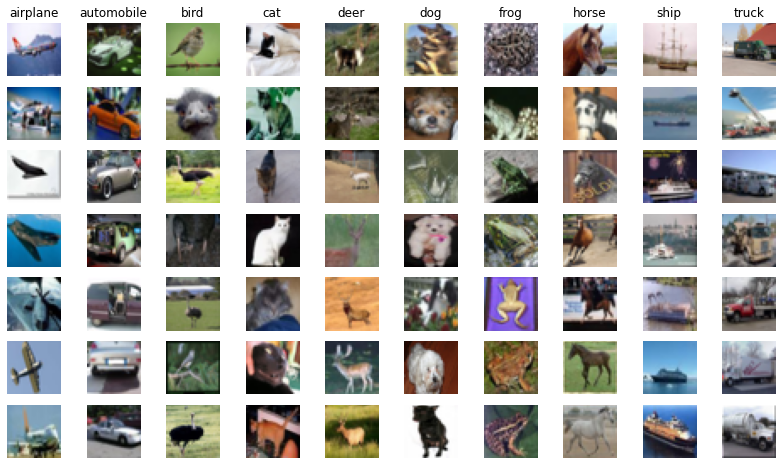

In [ ]:
plt.rcParams['figure.figsize'] = (14.0, 8.0) # set default size of plots
# "Names" of classes:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
num_classes = len(class_names)

samples_per_class = 7 # Number of images from each class we want to see
for y, cls in enumerate(class_names):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx], plt.get_cmap('gray'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [ ]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_test_norm = (X_test - mu)/std

What if we use L2 regularisation or in other words weight decay (don't confuse with learning rate decay, these are different things)

In [ ]:
from keras.layers import Input, Conv2D, Activation, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from keras import regularizers
from keras import optimizers
from keras import Sequential

def define_model_l2(lambda_):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_), input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(lambda_)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Flatten())
  
  model.add(Dense(100, activation='relu', kernel_regularizer=regularizers.l2(lambda_)))

  model.add(Dense(10, activation='softmax'))
  return(model)

def define_model_dropout(dropout_rate = 0):
  model = Sequential()
  model.add(Conv2D(32, (3,3), padding='same', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3,3), padding='same'))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(dropout_rate))

  model.add(Flatten())
  
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(dropout_rate))

  model.add(Dense(10, activation='softmax'))
  return(model)

By setting `lambda_` to 0 we effectively use no weight decay. Let's see what our network is capable of without L2 regularisation.

In [ ]:
# lambda_ = 0 to indicate no regularisation
model = define_model_l2(0)

# we can use sparse categorical crossentropy since our classes are mutually exclusive
# also we don't need to turn labels into the categorical one-hot coded variable  
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                        

In [ ]:
# As last time we fit the model
# fit function returns History object, which keeps record of all losses and accuracies that we can plot later
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=15, validation_split=0.2)

Epoch 1/15
313/313 [==============================] - 13s 11ms/step - loss: 1.6885 - accuracy: 0.3771 - val_loss: 1.3428 - val_accuracy: 0.5152
Epoch 2/15
313/313 [==============================] - 3s 9ms/step - loss: 1.2265 - accuracy: 0.5581 - val_loss: 1.0861 - val_accuracy: 0.6184
Epoch 3/15
313/313 [==============================] - 3s 9ms/step - loss: 0.9773 - accuracy: 0.6549 - val_loss: 0.9854 - val_accuracy: 0.6574
Epoch 4/15
313/313 [==============================] - 3s 9ms/step - loss: 0.8064 - accuracy: 0.7184 - val_loss: 0.8882 - val_accuracy: 0.6934
Epoch 5/15
313/313 [==============================] - 3s 9ms/step - loss: 0.6591 - accuracy: 0.7681 - val_loss: 0.8162 - val_accuracy: 0.7228
Epoch 6/15
313/313 [==============================] - 3s 10ms/step - loss: 0.5480 - accuracy: 0.8069 - val_loss: 0.8416 - val_accuracy: 0.7278
Epoch 7/15
313/313 [==============================] - 3s 11ms/step - loss: 0.4267 - accuracy: 0.8496 - val_loss: 0.8543 - val_accuracy: 0.7308
Ep

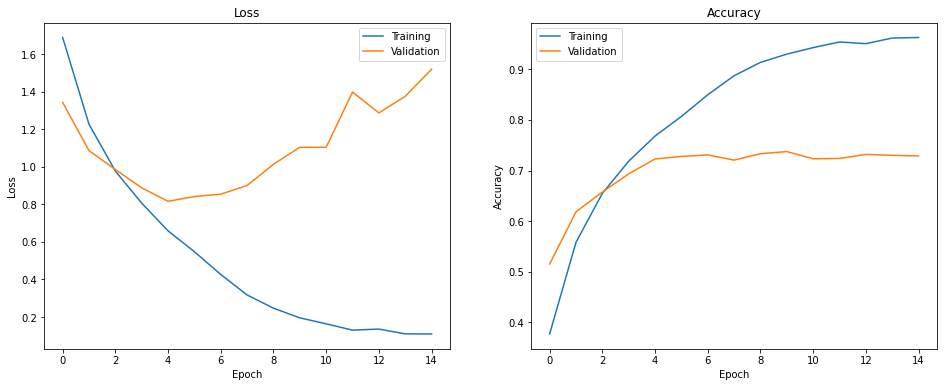

In [ ]:
# plot the trajectories
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.5827 - accuracy: 0.7187


[1.582688808441162, 0.7186999917030334]

Now let's add some (0.003) **L2** regularisation to our model

In [ ]:
# Adding the L2 regularisation:
model = define_model_l2(0.003)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

Train again

In [ ]:
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=30, validation_split=0.2)

Epoch 1/30
313/313 [==============================] - 5s 10ms/step - loss: 2.1309 - accuracy: 0.3537 - val_loss: 1.7308 - val_accuracy: 0.4438
Epoch 2/30
313/313 [==============================] - 3s 9ms/step - loss: 1.6442 - accuracy: 0.4792 - val_loss: 1.5440 - val_accuracy: 0.5154
Epoch 3/30
313/313 [==============================] - 3s 9ms/step - loss: 1.4916 - accuracy: 0.5375 - val_loss: 1.3976 - val_accuracy: 0.5660
Epoch 4/30
313/313 [==============================] - 3s 9ms/step - loss: 1.3799 - accuracy: 0.5920 - val_loss: 1.3222 - val_accuracy: 0.6038
Epoch 5/30
313/313 [==============================] - 3s 9ms/step - loss: 1.2985 - accuracy: 0.6225 - val_loss: 1.2809 - val_accuracy: 0.6244
Epoch 6/30
313/313 [==============================] - 3s 9ms/step - loss: 1.2322 - accuracy: 0.6507 - val_loss: 1.2020 - val_accuracy: 0.6582
Epoch 7/30
313/313 [==============================] - 3s 9ms/step - loss: 1.1799 - accuracy: 0.6734 - val_loss: 1.2277 - val_accuracy: 0.6608
Epoch

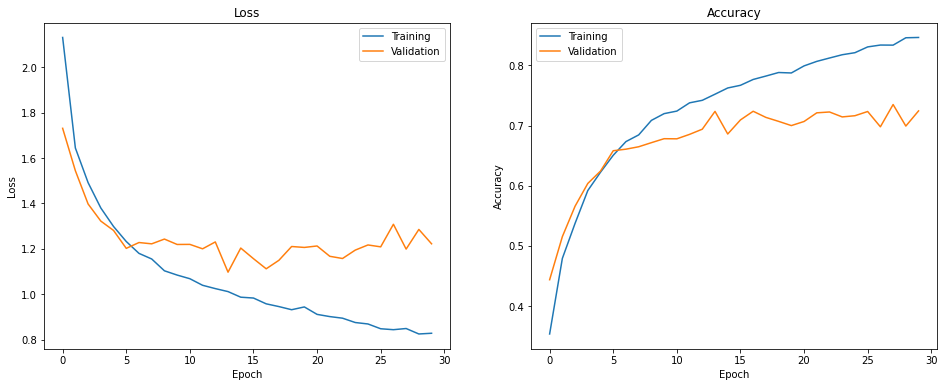

In [ ]:
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.2481 - accuracy: 0.7201


[1.2480995655059814, 0.7200999855995178]

In [ ]:
# Using dropout instead of L2:
model = define_model_dropout(0.25)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train_norm, y_train, batch_size=64, epochs=20, validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 4s 10ms/step - loss: 1.8130 - accuracy: 0.3195 - val_loss: 1.4107 - val_accuracy: 0.4726
Epoch 2/20
313/313 [==============================] - 3s 9ms/step - loss: 1.4018 - accuracy: 0.4872 - val_loss: 1.2220 - val_accuracy: 0.5592
Epoch 3/20
313/313 [==============================] - 3s 9ms/step - loss: 1.1905 - accuracy: 0.5674 - val_loss: 1.0519 - val_accuracy: 0.6216
Epoch 4/20
313/313 [==============================] - 3s 9ms/step - loss: 1.0592 - accuracy: 0.6221 - val_loss: 1.0284 - val_accuracy: 0.6404
Epoch 5/20
313/313 [==============================] - 3s 9ms/step - loss: 0.9647 - accuracy: 0.6546 - val_loss: 0.9307 - val_accuracy: 0.6632
Epoch 6/20
313/313 [==============================] - 3s 9ms/step - loss: 0.8810 - accuracy: 0.6878 - val_loss: 0.8566 - val_accuracy: 0.7054
Epoch 7/20
313/313 [==============================] - 3s 9ms/step - loss: 0.8171 - accuracy: 0.7154 - val_loss: 0.7845 - val_accuracy: 0.7252
Epoch

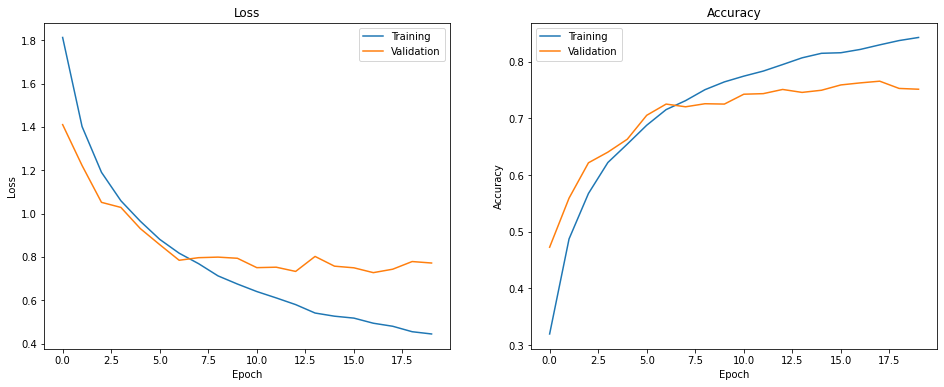

In [ ]:
# plot the trajectories
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.7959 - accuracy: 0.7537


[0.7959011793136597, 0.7537000179290771]

## Augmentation

As we discussed in the lecture, augmentation is one of the most simple, yet effective ways to improve generalisation of many machine learning models. Unfortunately, not all types of data can be easily augmented (e.g. tabular data, or some sounds). Here we look at image augmentation techniques using Keras builtin `ImageDataGenerator` class (https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

`ImageDataGenerator` is a framework that is used to apply a sereis of transformations (also knowns as augmentations) to the input images. Here is an example of simple augmentation pipeline using `ImageDataGenerator`:

In [ ]:
datagen = ImageDataGenerator(rotation_range=90, # randomly rotate an image from 0 to 90 degrees
                 width_shift_range=0.1,  # horizontally shift an image by a fraction of 0% - 10% (of original width)   
                 height_shift_range=0.1, # vertically shift an image by a fraction of 0% - 10% (of original height)   
                 horizontal_flip=True) # horizontaly flip random 30% of images 

# assign augmentation pipeline to our data
datagen.fit(X_train)

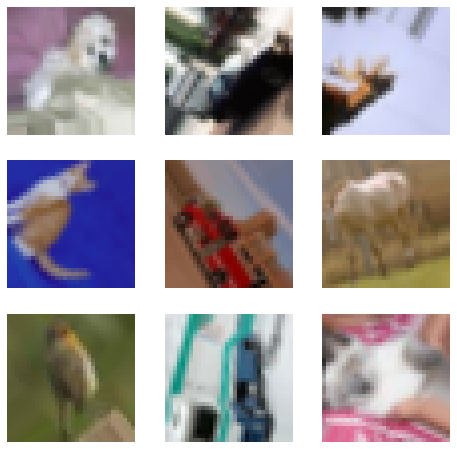

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams['figure.figsize'] = (8.0, 8.0) # set default size of plots

# Configure batch size and retrieve one batch of images
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    # Show 9 images
    for i in range(0, 9):
        plt.subplot(3, 3, 1 + i)
        plt.imshow(X_batch[i].astype('uint8'))
        plt.axis('off')
    # show the plot
    plt.show()
    break

Data generators in Keras do not have `validation_split` option for training. Why?
Here we create a separate validation set:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, random_state = 111, test_size = 0.10)

print(X_train.shape)
print(X_val.shape)

(22500, 32, 32, 3)
(2500, 32, 32, 3)


In [ ]:
mu = X_train.mean(axis=(0,1,2)) # finds mean of R, G and B separately
std = X_train.std(axis=(0,1,2)) # same for std
X_train_norm = (X_train - mu)/std
X_val_norm = (X_val - mu)/std
X_test_norm = (X_test - mu)/std

Let's use the same simple augmentation schema as we defined before, but instead of 0 to 90 degrees, limit random rotation range from 0 to 15 degrees: 

In [ ]:
##### YOUR CODE STARTS #####

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False,
    )

# assign augmentation schema to X_train_norm
datagen.fit(X_train_norm)
##### YOUR CODE ENDS ##### 

In [ ]:
##### YOUR CODE STARTS #####
from tensorflow.keras.utils import to_categorical
# Create a model 
model = define_model_l2(0.00001)

# Compile the model as before (code is identical)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

# each batch is created by datagen.flow function that we saw before
history = model.fit(datagen.flow(X_train_norm, to_categorical(y_train), batch_size=64),
                    steps_per_epoch=X_train_norm.shape[0]//64, # number of steps per epochs, needs to be specified as we do augmentation
                    epochs=25,
                    verbose=1,
                    validation_data=(X_val_norm, to_categorical(y_val))
                    )
##### YOUR CODE ENDS ##### 

Epoch 1/25
351/351 [==============================] - 14s 38ms/step - loss: 1.7109 - accuracy: 0.3659 - val_loss: 1.4095 - val_accuracy: 0.4892
Epoch 2/25
351/351 [==============================] - 14s 40ms/step - loss: 1.3203 - accuracy: 0.5214 - val_loss: 1.1237 - val_accuracy: 0.5996
Epoch 3/25
351/351 [==============================] - 13s 38ms/step - loss: 1.1325 - accuracy: 0.5963 - val_loss: 1.0137 - val_accuracy: 0.6456
Epoch 4/25
351/351 [==============================] - 13s 37ms/step - loss: 1.0125 - accuracy: 0.6414 - val_loss: 0.9068 - val_accuracy: 0.6872
Epoch 5/25
351/351 [==============================] - 13s 36ms/step - loss: 0.9137 - accuracy: 0.6807 - val_loss: 0.8656 - val_accuracy: 0.7032
Epoch 6/25
351/351 [==============================] - 13s 36ms/step - loss: 0.8438 - accuracy: 0.7088 - val_loss: 0.7828 - val_accuracy: 0.7416
Epoch 7/25
351/351 [==============================] - 13s 36ms/step - loss: 0.7765 - accuracy: 0.7307 - val_loss: 0.7362 - val_accuracy:

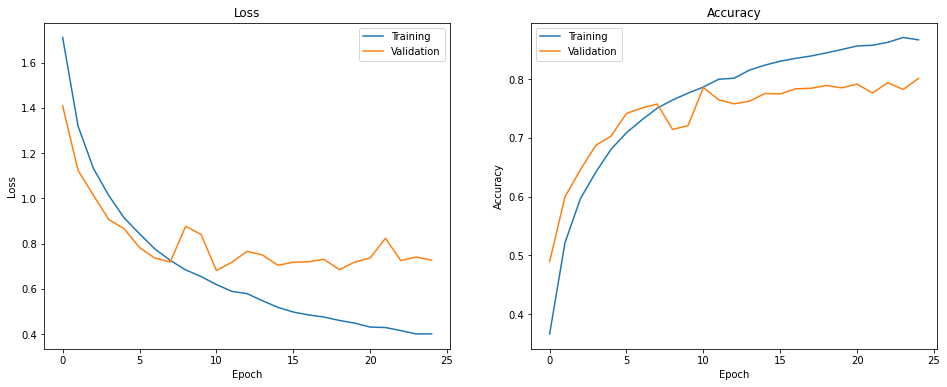

In [ ]:
plot_curves(history)

In [ ]:
# Loss and accuracy on test set
model.evaluate(X_test_norm, to_categorical(y_test))

313/313 [==============================] - 1s 4ms/step - loss: 0.8442 - accuracy: 0.7783


[0.8442195057868958, 0.7782999873161316]